# Analizando el oro vs SP500 - Un poco de estadísticas con Python

Este notebook es el soporte del artículo [Analizando el oro vs SP500 - Un poco de estadísticas con Python](http://estrategiastrading.com/oro-bolsa-estadisticas-con-python/) para http://estrategiastrading.com

In [1]:
# Primero las importaciones necesarias
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas_datareader import data as web

Para el análisis voy a utilizar dos ETFs y descargar los datos desde YahooFinance

GLD - SPDR Gold Trust y SPY - SPDR S&P 500 ETF Trust

Fechas entre 1/1/2005 ( fecha inicial de GLD) y 1/11/2016.

Si prefieres realizar tu análisis con cualquier otro valor, es muy sencillo modificarlo cambiando los tickers

In [2]:
start = pd.Timestamp ('2005-01-01')
end = pd.Timestamp ('2016-11-01')
spy = web.DataReader ('SPY', 'yahoo',start,end)
spy = spy.drop('Volume', axis =1)
gld = web.DataReader('GLD', 'yahoo', start, end)
gld = gld.drop('Volume', axis =1)

In [3]:
spy.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,94.817296
2005-01-04,120.459999,120.540001,118.440002,118.830002,93.658679
2005-01-05,118.739998,119.250000,118.000000,118.010002,93.012377
2005-01-06,118.440002,119.150002,118.260002,118.610001,93.485280
2005-01-07,118.970001,119.230003,118.129997,118.440002,93.351292


In [4]:
gld.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2005-01-03,42.980000,43.169998,42.740002,43.020000,43.020000
2005-01-04,42.799999,42.910000,42.459999,42.740002,42.740002
2005-01-05,42.750000,42.880001,42.599998,42.669998,42.669998
2005-01-06,42.480000,42.560001,42.070000,42.150002,42.150002
2005-01-07,42.090000,42.389999,41.700001,41.840000,41.840000


In [5]:
#Chequeo: ¿cuántas filas de datos tengo en cada serie? ¿Es la misma cantidad de datos?
len(spy.Close),len (gld.Close)


(2980, 2980)

## Gráfico

Comenzamos mirando la evolución de sus precios en un gráfico.
Para SPY tomo Adj Close para ajustar la evolución al pago de los dividendos

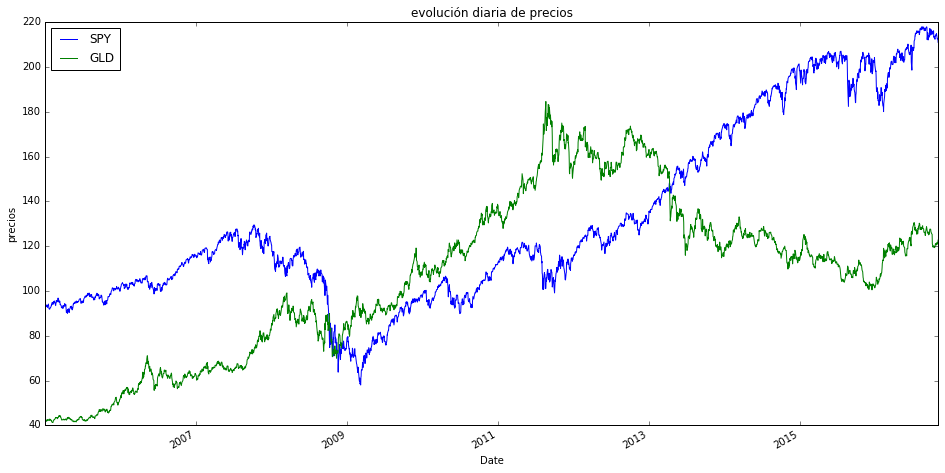

In [8]:
plt.figure(figsize=(16,8))
spy['Adj Close'].plot()
gld.Close.plot()

plt.title ('evolución diaria de precios')
plt.ylabel('precios')
plt.legend(['SPY','GLD'], loc = 0);

Si miramos la evolución de las cotizaciones se ven periodos donde los precios han tenido la misma dirección ( misma tendencia) y otros periodos donde su dirección ha sido contraria.

## Ajustamos a un time frame semanal

In [9]:
SPY_sem = spy.resample('W', label = 'left').agg({'Open':'first',
                                                'High':'max',
                                                'Low':'min',
                                                'Close':'last',
                                                'Adj Close':'last'})
SPY_sem.tail()

,Open,High,Low,Adj Close,Close
Date,,,,,
2016-10-02,215.820007,216.300003,213.990005,215.039993,215.039993
2016-10-09,216.160004,216.699997,211.210007,213.119995,213.119995
2016-10-16,213.089996,214.639999,212.169998,213.979996,213.979996
2016-10-23,215.000000,215.320007,211.710007,212.539993,212.539993
2016-10-30,212.929993,213.190002,209.600006,211.009995,211.009995


In [11]:
GLD_sem = gld.resample('W', label = 'left').agg({'Open':'first',
                                                'High':'max',
                                                'Low':'min',
                                                'Close':'last',
                                                'Adj Close':'last'})
GLD_sem.tail()

,Open,High,Low,Adj Close,Close
Date,,,,,
2016-10-02,125.320000,125.459999,118.419998,119.739998,119.739998
2016-10-09,119.739998,120.419998,119.290001,119.360001,119.360001
2016-10-16,119.699997,121.589996,119.580002,120.830002,120.830002
2016-10-23,121.279999,122.480003,120.160004,121.580002,121.580002
2016-10-30,121.510002,123.209999,121.230003,122.730003,122.730003


### Gráfico semanal

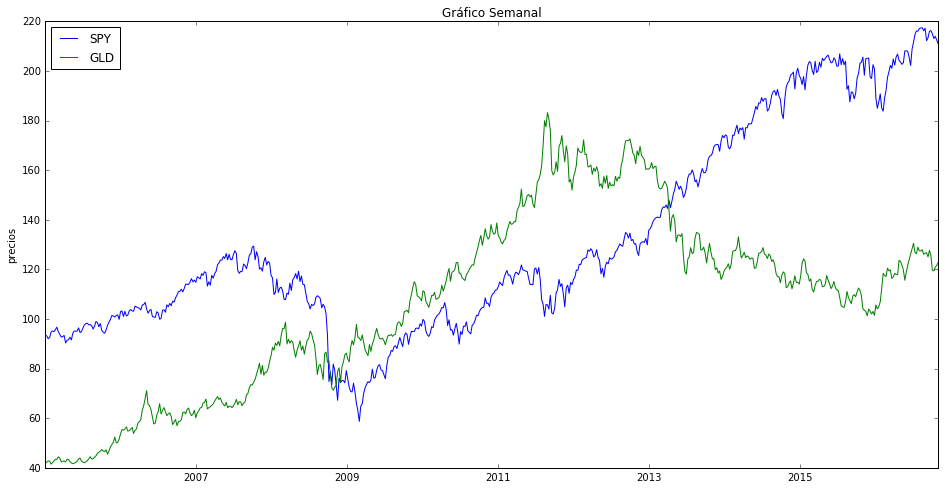

In [12]:
plt.figure(figsize=(16,8))
plt.plot(SPY_sem['Adj Close'])
plt.plot(GLD_sem['Close'])

plt.title ('Gráfico Semanal')
plt.ylabel('precios')
plt.legend(['SPY','GLD'], loc = 0);

## Rendimientos

Calculo los rendimientos porcentuales y logarítmicos de cada semana

In [27]:
# RENDIMIENTO % Y LOGARÍTMICO
SPY_rend_sem = SPY_sem['Adj Close'].pct_change()
SPY_sem['Log_Ret']= np.log(SPY_sem['Adj Close']) - np.log(SPY_sem['Adj Close'].shift(1))

GLD_rend_sem = GLD_sem['Close'].pct_change()
GLD_sem['Log_Ret'] = np.log(GLD_sem['Close']) - np.log(GLD_sem['Close'].shift(1))
#otra forma de calcular el rendimientologaritmico apartirdel simple
GLD_sem['Log_Ret_2'] = np.log(1 + GLD_rend_sem )
len(SPY_sem.Log_Ret)

618

Visualizamos algunas filas de la tabla para chequear

In [17]:
GLD_sem[1:5]

,Open,High,Low,Adj Close,Close,Log_Ret,Log_Ret_2
Date,,,,,,,
2005-01-09,41.990002,42.790001,41.889999,42.320000,42.320000,0.011407,0.011407
2005-01-16,42.220001,42.820000,42.110001,42.740002,42.740002,0.009876,0.009876
2005-01-23,42.740002,42.820000,42.099998,42.689999,42.689999,-0.001171,-0.001171
2005-01-30,42.209999,42.299999,41.389999,41.470001,41.470001,-0.028994,-0.028994


### Rentabilidad: Distribución ( Histograma) y valores medios


In [25]:
# Media
media_log_sem = (GLD_sem.Log_Ret.mean(),SPY_sem.Log_Ret.mean())
media_log_sem 

(0.001321775999586396, 0.0017441394251161261)

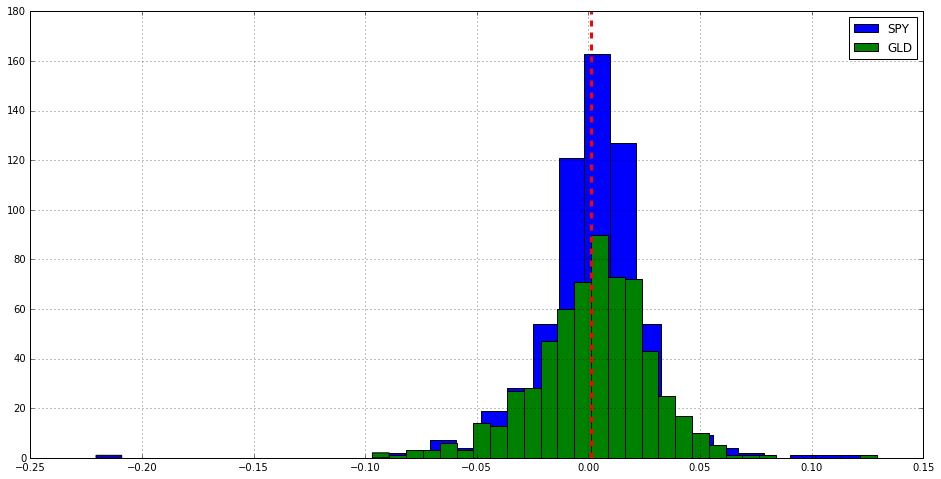

In [19]:
#Histograma
SPY_sem.Log_Ret.hist(bins=30,figsize =(16,8))
GLD_sem.Log_Ret.hist(bins=30,figsize =(16,8))

plt.legend(['SPY','GLD'], loc = 0)
plt.axvline(SPY_sem.Log_Ret.mean(), color='r',linestyle='dashed', linewidth=3);

#### Localizo events extremos

In [24]:
#Busco cuando ha sucedido la pérdida semanal superior a 20%
SPY_sem.loc[SPY_sem['Log_Ret'] < -0.2]

,Open,High,Low,Adj Close,Close,Log_Ret
Date,,,,,,
2008-10-05,107.150002,107.620003,83.580002,74.795442,88.5,-0.220564


## Comparativa con distribución normal

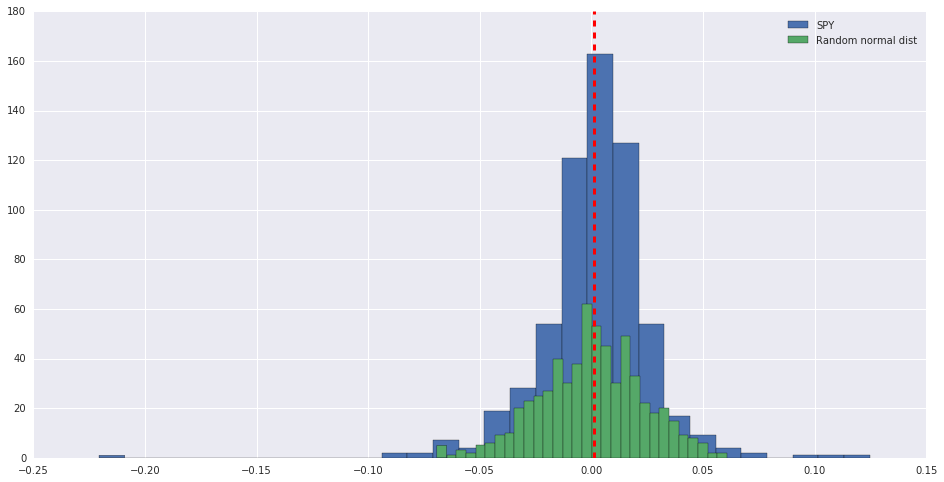

In [54]:
#Nota: cada vez que ejecutes el grafico, se generará una nueva serie de datos para representar la distribución normal.
SPY_sem.Log_Ret.hist(bins=30,figsize =(16,8))
plt.hist(np.random.normal(np.mean(SPY_sem.Log_Ret), np.std(SPY_sem.Log_Ret),len(SPY_sem.Log_Ret)),bins=30)

plt.legend(['SPY','Random normal dist'], loc = 0)
plt.axvline(SPY_sem.Log_Ret.mean(), color='r',linestyle='dashed', linewidth=3);

## Testeo graficos con Seaborn

In [37]:
import seaborn as sns

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


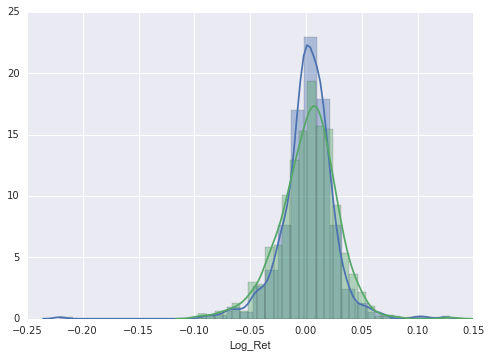

In [22]:
# Testeo el histograma con seaborn

sns.distplot(SPY_sem['Log_Ret'][1:], bins=30)
sns.distplot (GLD_sem.Log_Ret[1:], bins=30)

## Volatilidad: medida como desviación estándar

In [23]:
#desviación estándar
(SPY_sem.Log_Ret.std(),GLD_sem.Log_Ret.std())

(0.024847103484906666, 0.02601512395699718)

Dos metodos para la volatilidad anualizada ( parto de la semanal)

In [24]:
vol_anual = (np.sqrt(52* SPY_sem.Log_Ret.var()),np.sqrt(52* GLD_sem.Log_Ret.var()))
vol_anual

(0.17917501132318192, 0.18759772672900993)

In [25]:
vol_anual_2 = (np.sqrt(52)* SPY_sem.Log_Ret.std()),(np.sqrt(52) * GLD_sem.Log_Ret.std())
vol_anual_2

(0.17917501132318192, 0.18759772672900993)

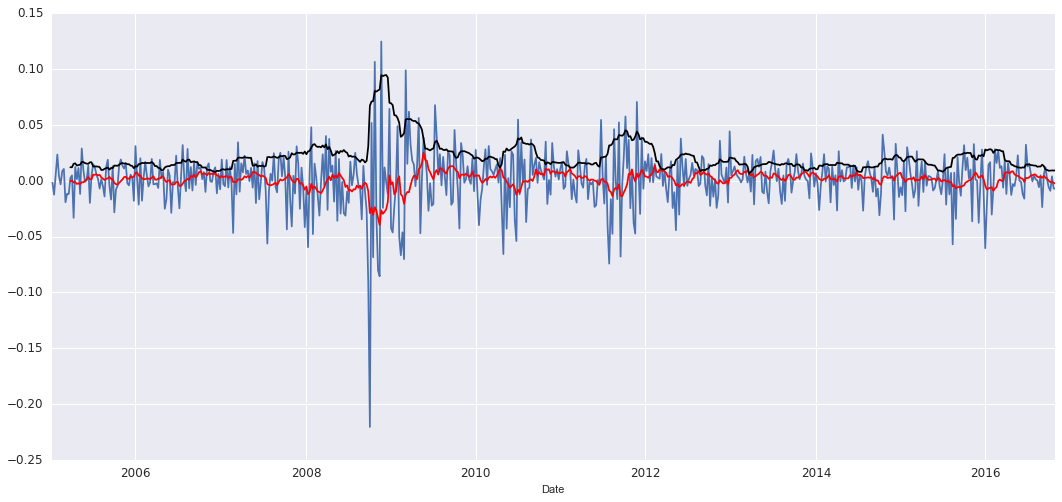

In [26]:
#media movil 12 semanas sobre rentabilidad logartímica
# desviacion estándar movil sobre 12 semanas
r = SPY_sem.Log_Ret.rolling (window = 12) 

SPY_sem.Log_Ret.plot()
r.mean().plot(color = 'red',figsize=(18,8),fontsize=12)
r.std().plot(color = 'k')

#  Correlaciones

In [46]:
c = SPY_sem.Log_Ret.corr(GLD_sem.Log_Ret)
c

0.0066021494325757338

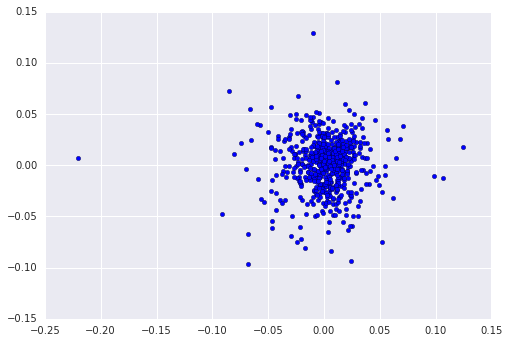

In [28]:
plt.scatter(SPY_sem.Log_Ret,GLD_sem.Log_Ret)

## Moving windows

Podemos pensar que la correlacion es nula, pero sin embargo intuitivamente seguimos creyendo que hay periodos de alta correlación.

¿Qué tal si miramos cómo evoluciona la correlación a lo largo del tiempo?

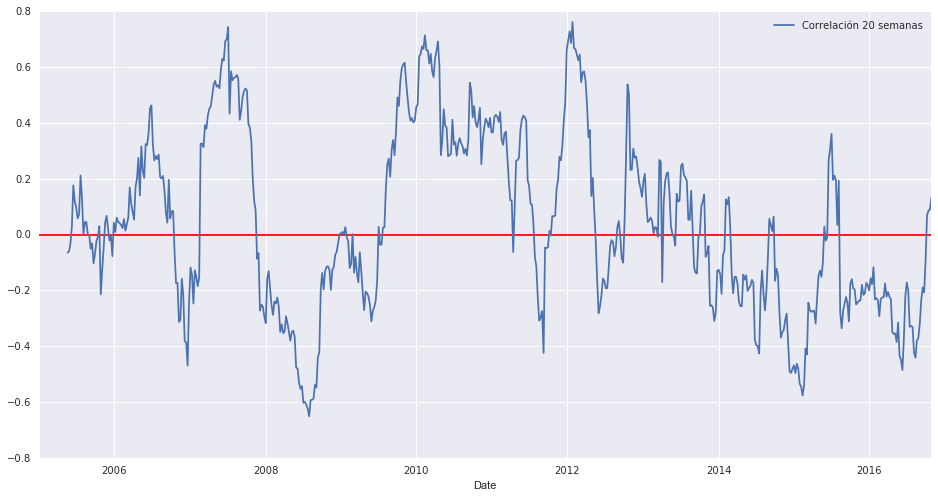

In [62]:
SPY_sem.rolling(20).corr(GLD_sem)['Log_Ret'].plot(figsize=(16,8))
plt.hlines(0,start,end, color= 'r')
plt.legend(['Correlación 20 semanas'], loc = 0)

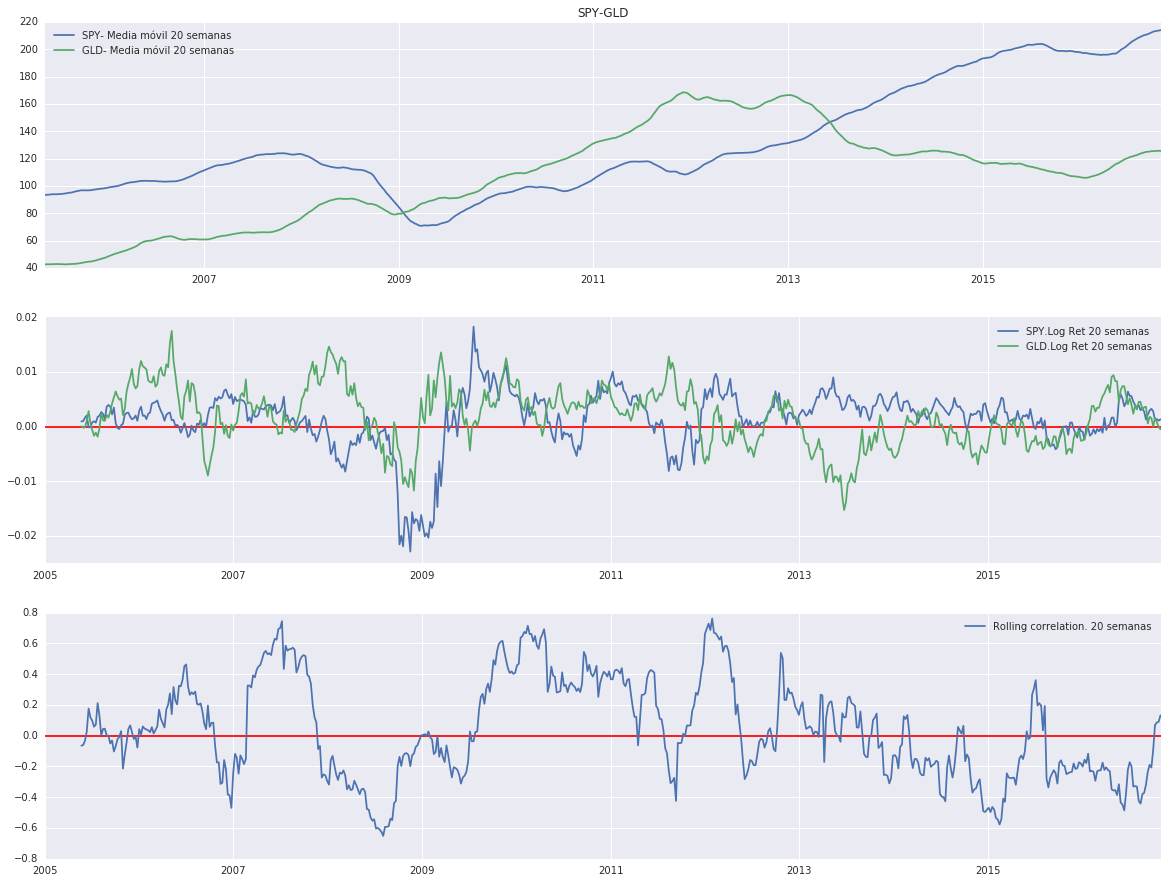

In [68]:
fig, axes = plt.subplots(nrows=3, ncols = 1, figsize = (20,15))
axes[0].plot(SPY_sem['Adj Close'].rolling (window = 20).mean())
axes[0].plot(GLD_sem['Close'].rolling (window = 20).mean())
axes[0].set_title('SPY-GLD')
axes[0].legend(['SPY- Media móvil 20 semanas','GLD- Media móvil 20 semanas'], loc = 0)

axes[1].plot(SPY_sem.Log_Ret.rolling (window = 20).mean())
axes[1].plot(GLD_sem.Log_Ret.rolling (window = 20).mean())
axes[1].hlines(0,start,end, color= 'r')
axes[1].legend(['SPY.Log Ret 20 semanas','GLD.Log Ret 20 semanas'], loc = 0)

axes[2].plot(SPY_sem.rolling(20).corr(GLD_sem)['Log_Ret'])
axes[2].hlines(0,start,end, color= 'r')
axes[2].legend(['Rolling correlation. 20 semanas'],loc = 0)
